# Import Necessery Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


# Data Collection and Preprocessing

## 1. Dataset Selection

In [2]:
#2nd way
with open('/kaggle/input/traffic-violations/data.json') as data_file:    
    d= json.load(data_file)  

column_names = d['meta']['view']['columns']
columns = [column['name'] for column in column_names]

In [3]:
df_assigned = pd.json_normalize(d, 'data').assign(**d['meta'])
df_assigned = df_assigned.drop(columns=['view'])
df_assigned.columns = columns
column_types = {col['name']: col['dataTypeName'] for col in column_names}

In [4]:
df_assigned

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,SeqID,Date Of Stop,...,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities,Council Districts_from_i23j_3mj8,Council Districts 7
0,row-vh5b~wh68.bmtn,00000000-0000-0000-D797-23598F1F8CA4,0,1683105014,None,1683277817,None,{ },52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,2023-05-01T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",None,None,None,None,None,None,None
1,row-jyix-jptd_hv3h,00000000-0000-0000-F391-4A0A642F43A0,0,1700993415,None,1701166217,None,{ },9be35886-e00c-49c2-8f27-2f6307696a17,2023-11-25T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",4,4,23,17,1,4,2
2,row-u2f3-53xb-x6ss,00000000-0000-0000-0D53-E5A83A54E966,0,1700993415,None,1701166217,None,{ },9be35886-e00c-49c2-8f27-2f6307696a17,2023-11-25T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",4,4,23,17,1,4,2
3,row-qieq.2y2e.qn5w,00000000-0000-0000-941F-F4F5E96371C2,0,1701079814,None,1701252613,None,{ },4d37fa99-0df3-4a56-9ba6-692bce894a34,2023-11-26T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",4,4,23,6,1,4,2
4,row-kxjz~e6z2_7da2,00000000-0000-0000-0DED-DEAAFE234A87,0,1700993415,None,1701166217,None,{ },3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,2023-11-25T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918219,row-6www.zr56_3s52,00000000-0000-0000-2263-E2C45CFD5C37,0,1565791383,None,1683025449,None,{ },7443fc19-bb22-4d8b-a73d-61325e6c6269,2016-03-04T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",5,5,7,3065,1,5,7
1918220,row-gxdp~h5hb.q7gt,00000000-0000-0000-F377-D75E668DB4CA,0,1565791383,None,1683025449,None,{ },15046153-2c14-4c90-8fba-05cc3e178079,2018-11-14T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",3,3,25,71,1,3,4
1918221,row-wr6h.9xvv-ce59,00000000-0000-0000-DFF7-7E181497B0D0,0,1565791383,None,1683025449,None,{ },9ab3f931-1506-400c-b23b-0f1fc567cc89,2019-05-21T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",None,None,None,None,None,None,None
1918222,row-mdu7~stgh.skfa,00000000-0000-0000-4211-7C46E486299F,0,1565791383,None,1683025449,None,{ },ae19cf7b-3eef-4341-b370-04e5f1a7a558,2017-07-02T00:00:00,...,MD,A - Marked Patrol,"[{""address"": """", ""city"": """", ""state"": """", ""zip...",3,3,36,35,1,3,3


In [5]:
#Renaming the column names by removing the spaces
df_assigned = df_assigned.rename(columns={'Date Of Stop': 'Date_Of_Stop'})
df_assigned = df_assigned.rename(columns={'Time Of Stop': 'Time_Of_Stop'})
df_assigned = df_assigned.rename(columns={'Personal Injury': 'Personal_Injury'})
df_assigned = df_assigned.rename(columns={'Property Damage': 'Property_Damage'})
df_assigned = df_assigned.rename(columns={'Commercial License': 'Commercial_License'})
df_assigned = df_assigned.rename(columns={'Commercial Vehicle': 'Commercial_Vehicle'})
df_assigned = df_assigned.rename(columns={'Work Zone': 'Work_Zone'})
df_assigned = df_assigned.rename(columns={'Vehicle Type': 'Vehicle_Type'})
df_assigned = df_assigned.rename(columns={'Violation Type': 'Violation_Type'})
df_assigned = df_assigned.rename(columns={'Contributed To Accident': 'Contributed_To_Accident'})

## 2. Data Cleaning:

In [6]:
df=df_assigned.drop(['sid','id','Agency','State','Color','Driver City','Search Reason','DL State','HAZMAT','Search Conducted','Charge','Article','Search Arrest Reason','Search Type','Search Reason For Stop','Arrest Type','Search Disposition','Search Outcome','Driver State','Geolocation'
                  ,'position', 'created_meta', 'updated_meta', 'meta'  ],axis=1)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918224 entries, 0 to 1918223
Data columns (total 34 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   created_at                        int64 
 1   updated_at                        int64 
 2   SeqID                             object
 3   Date_Of_Stop                      object
 4   Time_Of_Stop                      object
 5   SubAgency                         object
 6   Description                       object
 7   Location                          object
 8   Latitude                          object
 9   Longitude                         object
 10  Accident                          object
 11  Belts                             object
 12  Personal_Injury                   object
 13  Property_Damage                   object
 14  Fatal                             object
 15  Commercial_License                object
 16  Commercial_Vehicle                object
 17  Alcohol 

### 2.1 Address missing values by imputing them with the mean for numerical data.

In [8]:
numerical_columns=['Council Districts','Councils','Communities','Municipalities',
                  'Council Districts_from_i23j_3mj8','Council Districts 7','Year']

In [9]:
# Convert columns to numeric type
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with column means
df.fillna(value=df[numerical_columns].mean(), inplace=True)

### 2.2 remove doplication

In [10]:
df = df.drop_duplicates()
df

,created_at,updated_at,SeqID,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Location,Latitude,Longitude,...,Contributed_To_Accident,Race,Gender,Council Districts,Councils,Communities,Zip Codes,Municipalities,Council Districts_from_i23j_3mj8,Council Districts 7
0,1683105014,1683277817,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,2023-05-01T00:00:00,23:11:00,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0,0,...,False,WHITE,M,3.177737,3.177737,27.960635,None,3.784819,3.177737,3.878405
1,1700993415,1701166217,9be35886-e00c-49c2-8f27-2f6307696a17,2023-11-25T00:00:00,00:20:00,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.0529625,-77.0513041666667,...,False,HISPANIC,M,4.000000,4.000000,23.000000,17,1.000000,4.000000,2.000000
2,1700993415,1701166217,9be35886-e00c-49c2-8f27-2f6307696a17,2023-11-25T00:00:00,00:20:00,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.0529625,-77.0513041666667,...,False,HISPANIC,M,4.000000,4.000000,23.000000,17,1.000000,4.000000,2.000000
3,1701079814,1701252613,4d37fa99-0df3-4a56-9ba6-692bce894a34,2023-11-26T00:00:00,09:16:00,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.0583783333333,-77.0496516666667,...,False,HISPANIC,M,4.000000,4.000000,23.000000,6,1.000000,4.000000,2.000000
4,1700993415,1701166217,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,2023-11-25T00:00:00,05:45:00,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0,0,...,False,WHITE,M,3.177737,3.177737,27.960635,None,3.784819,3.177737,3.878405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918219,1565791383,1683025449,7443fc19-bb22-4d8b-a73d-61325e6c6269,2016-03-04T00:00:00,20:11:00,"3rd District, Silver Spring",TAG LIGHTS (*),SLIGO AVE. @ FENTON ST.,38.9903533333333,-77.0249816666667,...,False,HISPANIC,F,5.000000,5.000000,7.000000,3065,1.000000,5.000000,7.000000
1918220,1565791383,1683025449,15046153-2c14-4c90-8fba-05cc3e178079,2018-11-14T00:00:00,23:21:00,"5th District, Germantown",HEADLIGHTS (*),DARNESTOWN RD @TRAVILLE GATEWAY DR,39.095365,-77.1996666666667,...,False,WHITE,F,3.000000,3.000000,25.000000,71,1.000000,3.000000,4.000000
1918221,1565791383,1683025449,9ab3f931-1506-400c-b23b-0f1fc567cc89,2019-05-21T00:00:00,22:06:00,"3rd District, Silver Spring",HEADLIGHTS (*),NEW HAMPSHIRE/VENICE DR,0,0,...,False,HISPANIC,M,3.177737,3.177737,27.960635,None,3.784819,3.177737,3.878405
1918222,1565791383,1683025449,ae19cf7b-3eef-4341-b370-04e5f1a7a558,2017-07-02T00:00:00,13:19:00,"6th District, Gaithersburg / Montgomery Village",STOP LIGHTS (*),MIDCOUNTY HWY @ WASHINGTON GROVE,39.1439066666667,-77.162,...,False,WHITE,F,3.000000,3.000000,36.000000,35,1.000000,3.000000,3.000000


## 3. Column Removal:
### Exclude unnecessary columns
#### remove rows with all entites = NONE

In [11]:
df = df.dropna()
pd.isnull(df).sum()


created_at                          0
updated_at                          0
SeqID                               0
Date_Of_Stop                        0
Time_Of_Stop                        0
SubAgency                           0
Description                         0
Location                            0
Latitude                            0
Longitude                           0
Accident                            0
Belts                               0
Personal_Injury                     0
Property_Damage                     0
Fatal                               0
Commercial_License                  0
Commercial_Vehicle                  0
Alcohol                             0
Work_Zone                           0
VehicleType                         0
Year                                0
Make                                0
Model                               0
Violation_Type                      0
Contributed_To_Accident             0
Race                                0
Gender      

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1781870 entries, 1 to 1918223
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   created_at                        int64  
 1   updated_at                        int64  
 2   SeqID                             object 
 3   Date_Of_Stop                      object 
 4   Time_Of_Stop                      object 
 5   SubAgency                         object 
 6   Description                       object 
 7   Location                          object 
 8   Latitude                          object 
 9   Longitude                         object 
 10  Accident                          object 
 11  Belts                             object 
 12  Personal_Injury                   object 
 13  Property_Damage                   object 
 14  Fatal                             object 
 15  Commercial_License                object 
 16  Commercial_Vehicle                object 

## 4. Data Transformation: 

### Doing onehot encoding for gender

In [13]:
df = pd.get_dummies(df, columns=['Gender'])

### 4.1 Convert binary categorical values (e.g., Yes, No) to Boolean data for statistical analysis. 

In [14]:
pd.set_option('future.no_silent_downcasting', True)

df = df.replace({'Yes': 1, 'No': 0, 'True': 1, 'False': 0,True:1,False:0}).infer_objects(copy=False)


In [15]:
#counter for violations
df['Violation'] = pd.Series(1, index=df.index)

### 4.2 Convert date and time of stop to datetime data types to extract year, month, day, and hour information for further analysis 

In [16]:
# Converting date & time of stop to datetime data types
df['Date_Of_Stop'] = pd.to_datetime(df['Date_Of_Stop'], dayfirst=False)  # Specify dayfirst=False
df['Time_Of_Stop'] = pd.to_datetime(df['Time_Of_Stop'], format='%H:%M:%S')
df['year'], df['month'], df["day_of_week"] = df['Date_Of_Stop'].dt.year, df['Date_Of_Stop'].dt.month, df['Date_Of_Stop'].dt.dayofweek
df['day_code'] = df['Date_Of_Stop'].dt.strftime('%A')
df['month_code'] = df['Date_Of_Stop'].dt.strftime('%b')
df['hour'] = df['Time_Of_Stop'].dt.hour + 1


In [17]:
df=df.drop(['Date_Of_Stop','Time_Of_Stop'],axis=1)

In [18]:
pd.set_option('display.max_columns', None)
df

,created_at,updated_at,SeqID,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,VehicleType,Year,Make,Model,Violation_Type,Contributed_To_Accident,Race,Council Districts,Councils,Communities,Zip Codes,Municipalities,Council Districts_from_i23j_3mj8,Council Districts 7,Gender_F,Gender_M,Gender_U,Violation,year,month,day_of_week,day_code,month_code,hour
1,1700993415,1701166217,9be35886-e00c-49c2-8f27-2f6307696a17,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.0529625,-77.0513041666667,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,TOYOTA,COROLLA,Citation,0,HISPANIC,4.0,4.0,23.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,5,Saturday,Nov,1
2,1700993415,1701166217,9be35886-e00c-49c2-8f27-2f6307696a17,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.0529625,-77.0513041666667,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,TOYOTA,COROLLA,Citation,0,HISPANIC,4.0,4.0,23.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,5,Saturday,Nov,1
3,1701079814,1701252613,4d37fa99-0df3-4a56-9ba6-692bce894a34,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.0583783333333,-77.0496516666667,0,0,0,1,0,0,0,0,0,02 - Automobile,2004.0,TOYOTA,HB,Citation,0,HISPANIC,4.0,4.0,23.0,6,1.0,4.0,2.0,0,1,0,1,2023,11,6,Sunday,Nov,10
9,1700993415,1701166217,1e24ec33-6a13-483f-9fea-0c2cdc5b2a14,"2nd District, Bethesda",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,UNIVERSITY BLVD W & VEIRS MILL RD,39.0419323833333,-77.0587989666667,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,HYUN,ELANTA,Citation,0,HISPANIC,4.0,4.0,15.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,4,Friday,Nov,24
10,1700993415,1701166217,1e24ec33-6a13-483f-9fea-0c2cdc5b2a14,"2nd District, Bethesda","DRIVING, ATTEMPTING TO DRIVE MOTOR VEHICLE ON ...",UNIVERSITY BLVD W & VEIRS MILL RD,39.0419323833333,-77.0587989666667,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,HYUN,ELANTA,Citation,0,HISPANIC,4.0,4.0,15.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,4,Friday,Nov,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918218,1565791383,1683025449,da3841be-7c7b-4de8-b5ad-26dd9a9e4582,"2nd District, Bethesda",TAG LIGHTS (*),KANSAS AVE ON TO STEWART AVE,39.0006016666667,-77.047165,0,0,0,0,0,0,0,0,0,02 - Automobile,2007.0,TOYOTA,CAMRY,ESERO,0,HISPANIC,5.0,5.0,6.0,3065,1.0,5.0,7.0,0,1,0,1,2018,9,4,Friday,Sep,8
1918219,1565791383,1683025449,7443fc19-bb22-4d8b-a73d-61325e6c6269,"3rd District, Silver Spring",TAG LIGHTS (*),SLIGO AVE. @ FENTON ST.,38.9903533333333,-77.0249816666667,0,0,0,0,0,0,0,0,0,02 - Automobile,2005.0,CHEV,TRUCK,ESERO,0,HISPANIC,5.0,5.0,7.0,3065,1.0,5.0,7.0,1,0,0,1,2016,3,4,Friday,Mar,21
1918220,1565791383,1683025449,15046153-2c14-4c90-8fba-05cc3e178079,"5th District, Germantown",HEADLIGHTS (*),DARNESTOWN RD @TRAVILLE GATEWAY DR,39.095365,-77.1996666666667,0,0,0,0,0,0,0,0,0,02 - Automobile,2009.0,HONDA,FIT,ESERO,0,WHITE,3.0,3.0,25.0,71,1.0,3.0,4.0,1,0,0,1,2018,11,2,Wednesday,Nov,24
1918222,1565791383,1683025449,ae19cf7b-3eef-4341-b370-04e5f1a7a558,"6th District, Gaithersburg / Montgomery Village",STOP LIGHTS (*),MIDCOUNTY HWY @ WASHINGTON GROVE,39.1439066666667,-77.162,0,0,0,0,0,0,0,0,0,02 - Automobile,2004.0,TOYOTA,SIENNA,ESERO,0,WHITE,3.0,3.0,36.0,35,1.0,3.0,3.0,1,0,0,1,2017,7,6,Sunday,Jul,14


# DATA Analysis part

### plot Longitude & Latitude

In [19]:
# Convert 'Longitude' and 'Latitude' columns to numeric data types
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# Filter the DataFrame based on conditions
df = df[(-80 <= df['Longitude']) & (df['Longitude'] <= -75) & (37 <= df['Latitude']) & (df['Latitude'] <= 40)]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


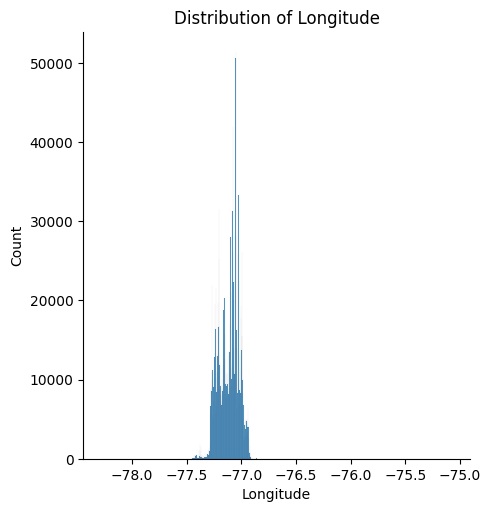

In [20]:
sns.displot(df['Longitude'])
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.show()

/tmp/ipykernel_150/2559294232.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


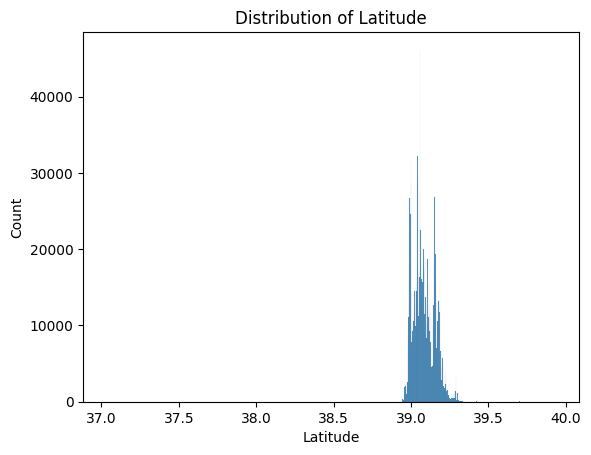

In [21]:
with pd.option_context('mode.use_inf_as_na', True):
    sns.histplot(df['Latitude'])
    plt.title('Distribution of Latitude')
    plt.xlabel('Latitude')
    plt.show()


# Calculate correlation
#### Correlations are weak. But Accidents are more correlted to Property Damage , next is personal injury. Also next Belts and Personal injury are more correlated at 3rd place.

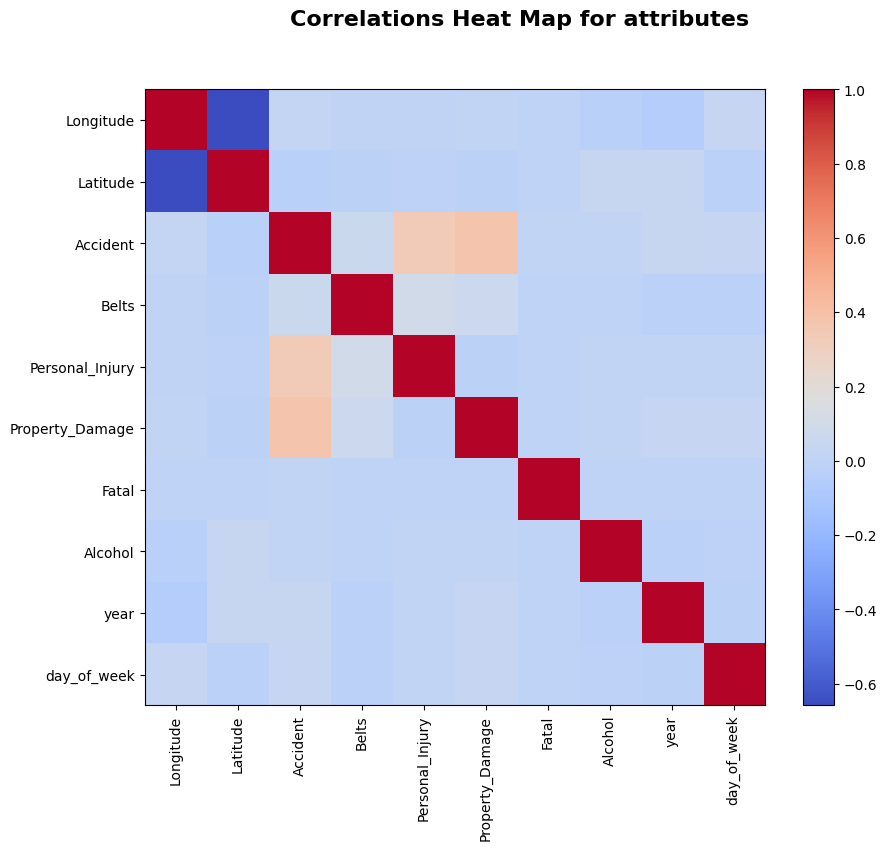

In [22]:
# List of column names to be converted to numeric
columns_to_convert = ['Longitude', 'Latitude', 'Accident', 'Belts', 'Personal_Injury', 'Property_Damage', 
                      'Fatal', 'Alcohol', 'year', 'day_of_week']

# Convert string columns to numeric (int or float)
df_numeric = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.suptitle('Correlations Heat Map for attributes', fontsize=16, fontweight='bold')
plt.show()


# Time Series Analysis
#### This table represents the number of traffic violations counted year-wise for each month code from 2012 to 2024. Each cell in the table indicates the total number of violations recorded for a specific month (represented by the month code) and year.

#### In 2015, the most traffic violations had happened.

In [23]:

# Creating another dataset of violations which only includes accidents
df1 = df[df['Accident'] == 1]

# Create a time series table for the number of traffic violation counts year-wise
vio_df1 = pd.DataFrame({'Violation': df['Violation'], 'month_code': df['month_code'], 'year': df['year']})
table1 = pd.pivot_table(vio_df1, index='month_code', columns='year', values='Violation', aggfunc='sum')

# Fill missing values with 0
table1 = table1.fillna(0)
table1

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
month_code,,,,,,,,,,,,,
Apr,10732.0,13235.0,18900.0,20543.0,19467.0,14665.0,21726.0,17535.0,1440.0,3267.0,5596.0,4903.0,2010.0
Aug,11753.0,14526.0,16669.0,19584.0,16852.0,16074.0,16848.0,14034.0,2693.0,5255.0,1656.0,5067.0,0.0
Dec,12126.0,13742.0,15854.0,16524.0,15394.0,14912.0,15694.0,11354.0,7058.0,7456.0,6461.0,4659.0,0.0
Feb,9324.0,12232.0,13568.0,15992.0,18265.0,18381.0,17519.0,16103.0,14063.0,4636.0,5930.0,6855.0,5978.0
Jan,8827.0,12271.0,13255.0,17831.0,15306.0,16022.0,17157.0,15656.0,12743.0,5027.0,4862.0,6167.0,4763.0
Jul,11328.0,13655.0,17849.0,18351.0,16200.0,15650.0,17043.0,14356.0,2196.0,5821.0,5065.0,5031.0,0.0
Jun,12660.0,11811.0,15925.0,18256.0,18514.0,14822.0,15677.0,13140.0,2360.0,3480.0,4482.0,5312.0,0.0
Mar,10583.0,14617.0,16851.0,20248.0,21036.0,18120.0,19166.0,19229.0,8426.0,5673.0,6335.0,5947.0,6450.0
May,16817.0,15864.0,20169.0,19839.0,17352.0,15569.0,16898.0,15612.0,4271.0,3564.0,5190.0,5418.0,0.0


In [24]:
# Sum up violations for each year
yearly_violations = table1.sum(axis=0)

# Get the year with the most traffic violations
year_with_most_violations = yearly_violations.idxmax()

# Get the number of violations for the year with the most violations
most_violations_count = yearly_violations.max()

print("Year with the most traffic violations:", year_with_most_violations)
print("Number of violations in that year:", most_violations_count)


Year with the most traffic violations: 2015
Number of violations in that year: 222766.0


#### This table represents a time series analysis of the number of traffic accidents counts year-wise, providing insights into patterns and trends over time.
#### In 2017, the most traffic accidents had happened.


In [25]:
# Creating time series table for number of traffic accidents counts year-wise to study the pattern and trend
acc_df1 = pd.DataFrame({'accident': df1['Accident'], 'mon_code': df1['month_code'], 'year': df1['year']})
table1 = pd.pivot_table(acc_df1, index='year', values='accident', columns='mon_code', aggfunc='sum')
table1 = table1.fillna(0)
table1


mon_code,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2012,155.0,290.0,361.0,144.0,170.0,251.0,273.0,191.0,369.0,274.0,260.0,313.0
2013,308.0,294.0,260.0,256.0,342.0,331.0,303.0,286.0,337.0,325.0,300.0,225.0
2014,279.0,377.0,423.0,275.0,262.0,323.0,351.0,287.0,409.0,368.0,402.0,297.0
2015,290.0,317.0,459.0,405.0,390.0,329.0,433.0,259.0,463.0,390.0,473.0,338.0
2016,420.0,437.0,579.0,315.0,351.0,390.0,373.0,437.0,470.0,381.0,514.0,540.0
2017,456.0,425.0,498.0,397.0,469.0,419.0,382.0,423.0,487.0,391.0,485.0,396.0
2018,353.0,347.0,429.0,329.0,413.0,385.0,443.0,281.0,362.0,408.0,447.0,374.0
2019,272.0,342.0,418.0,379.0,333.0,429.0,407.0,394.0,337.0,375.0,420.0,415.0
2020,150.0,249.0,315.0,413.0,367.0,257.0,235.0,231.0,268.0,230.0,219.0,170.0


In [26]:
# Sum up accidents for each year
yearly_accidents = table1.sum(axis=1)

# Get the year with the most traffic accidents
most_accident_year = yearly_accidents.idxmax()

# Get the number of accidents for the year with the most accidents
most_accident_count = yearly_accidents.max()

print("Year with the most traffic accidents:", most_accident_year)
print("Number of accidents in that year:", most_accident_count)


Year with the most traffic accidents: 2017
Number of accidents in that year: 5228.0


#### plotting time series for total accident per month trend


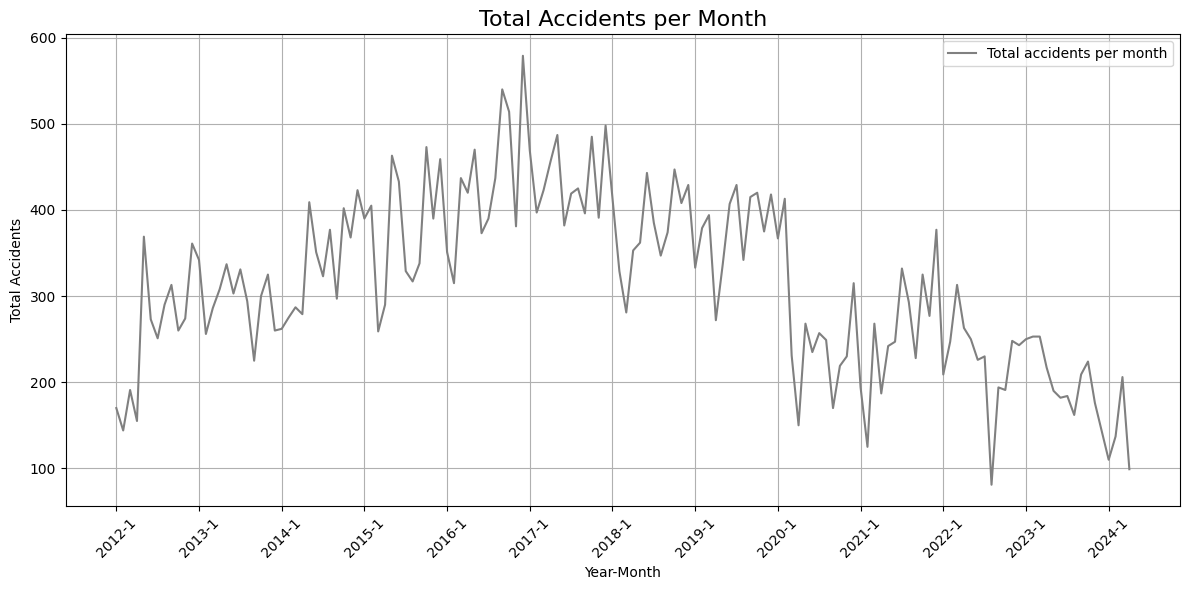

In [27]:
# Plotting time series for total accident per month trend
accidents_per_month = df1.groupby(['year', 'month']).size().reset_index(name='total_accidents')

# Creating a combined 'year-month' column for easier plotting
accidents_per_month['year_month'] = accidents_per_month['year'].astype(str) + '-' + accidents_per_month['month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(accidents_per_month['year_month'], accidents_per_month['total_accidents'], label='Total accidents per month', color='grey')
plt.xticks(range(0, len(accidents_per_month), 12), accidents_per_month['year_month'].iloc[::12], rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Accidents')
plt.title('Total Accidents per Month', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### The best month for traffic accidents occurred in August of 2022 with only 81 accidents.
#### The worst month for traffic accidents occurred in December of 2016 with a total of 579 accidents.


In [28]:
# Grouping the data by year and month and summing up the accidents for each month
monthly_accidents = df1.groupby(['year', 'month']).size()

# Finding the best and worst months
best_month = monthly_accidents.idxmin()
worst_month = monthly_accidents.idxmax()

print("Best Month:", best_month, ":", monthly_accidents[best_month])
print("Worst Month:", worst_month, ":", monthly_accidents[worst_month])


Best Month: (2022, 8) : 81
Worst Month: (2016, 12) : 579


# Relation Between Place and Violations
#### We see that most of the traffic violations and also violations that involved accidents took place in 4th District, Wheaton Subagency

Text(0.5, 0, 'Number of Cases')

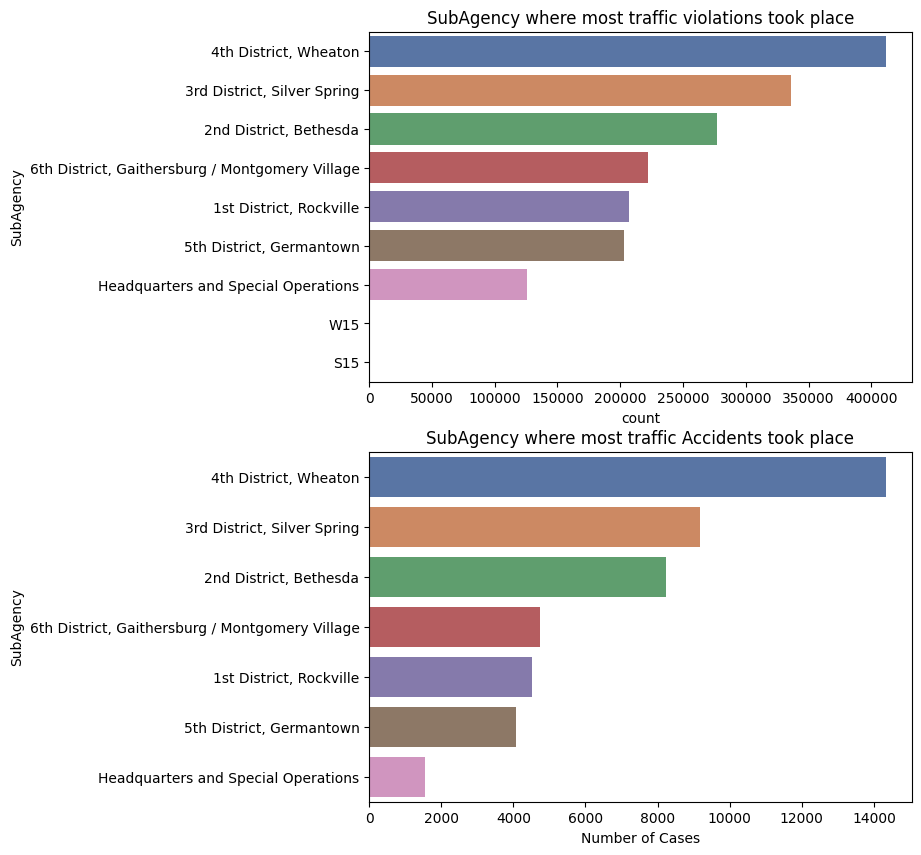

In [29]:

plt.figure(figsize=(7,10))
plt.subplot(211)
chains=df['SubAgency'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("SubAgency where most traffic violations took place")

plt.subplot(212)
chains=df1['SubAgency'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("SubAgency where most traffic Accidents took place")
plt.xlabel("Number of Cases")

# Analysis of Violation Reasons
#### the most reason for most of the violations is due to disobedience of the driver like not following traffic instructions and having valid registration. And the reason for most of the accidents is due to high speed and negligent driving. 


Text(0.5, 0, 'Count')

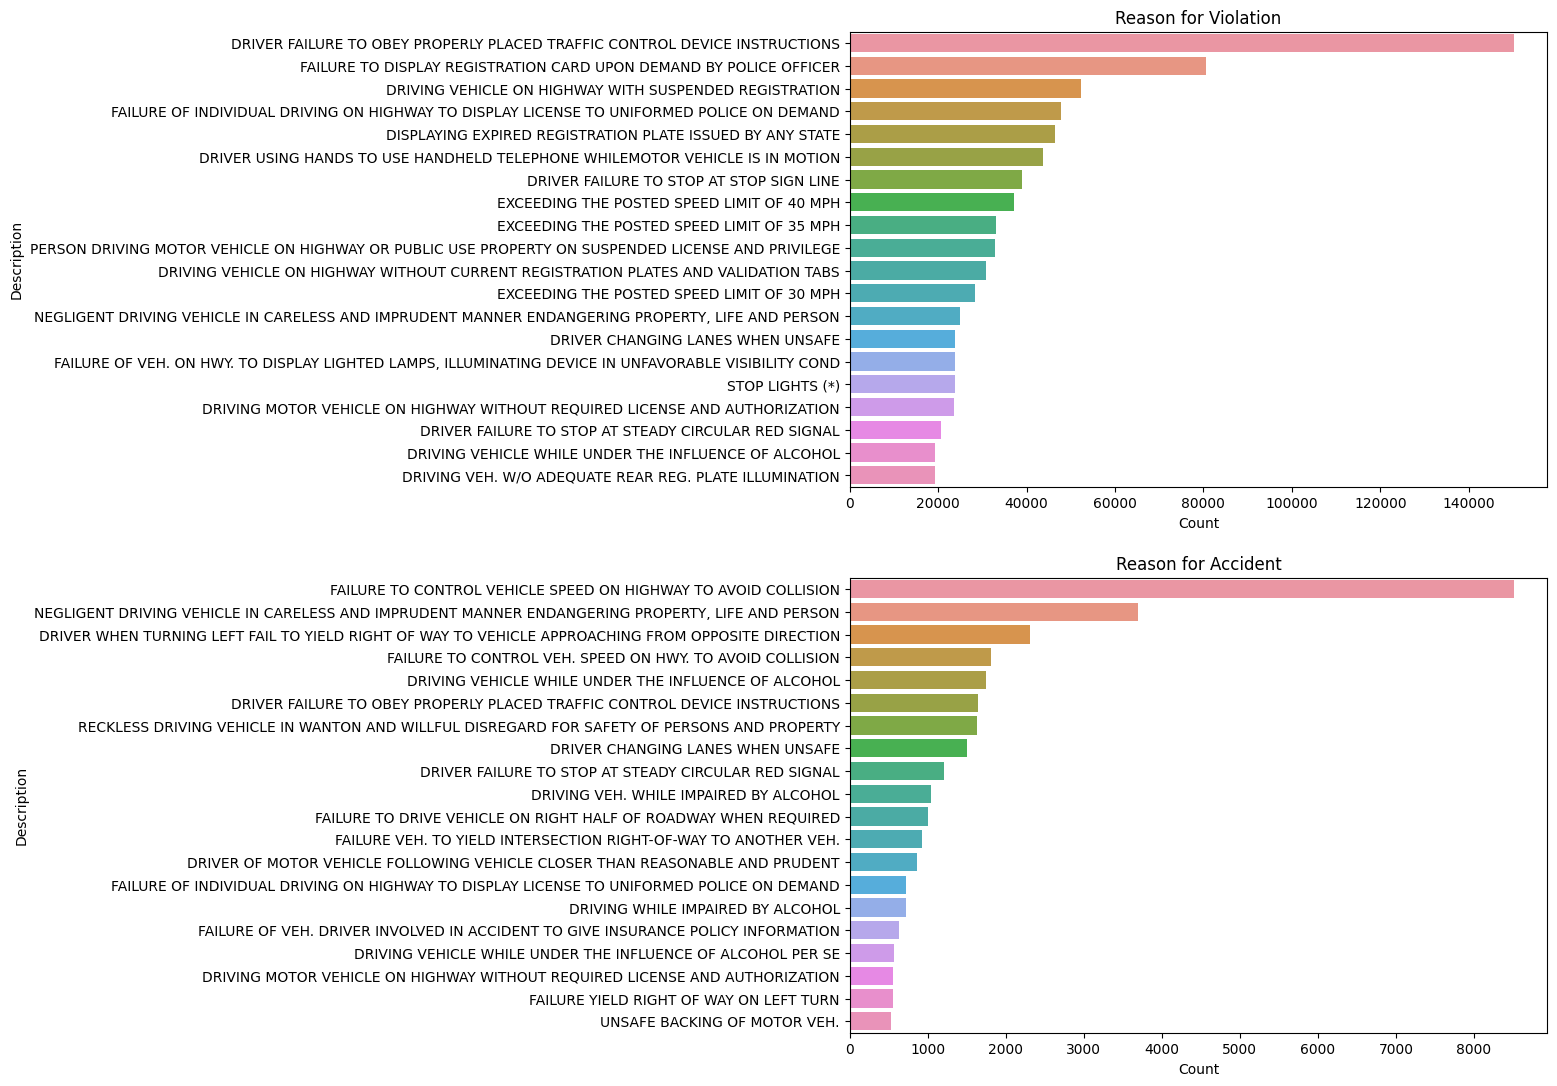

In [30]:
# Description
plt.figure(figsize=(9, 13))

plt.subplot(211)
rest = df['Description'].value_counts()[:20]
sns.barplot(x=rest, y=rest.index)
plt.title("Reason for Violation")
plt.xlabel("Count")

plt.subplot(212)
rest = df1['Description'].value_counts()[:20]
sns.barplot(x=rest, y=rest.index)
plt.title("Reason for Accident")
plt.xlabel("Count")


#### Most of the violations took place at Wayne AVE @ DAIL DR and the highest accidents took place is at CONNECTICUT AVE @ VEIRS MILL RD

Text(0.5, 0, 'Number of Cases')

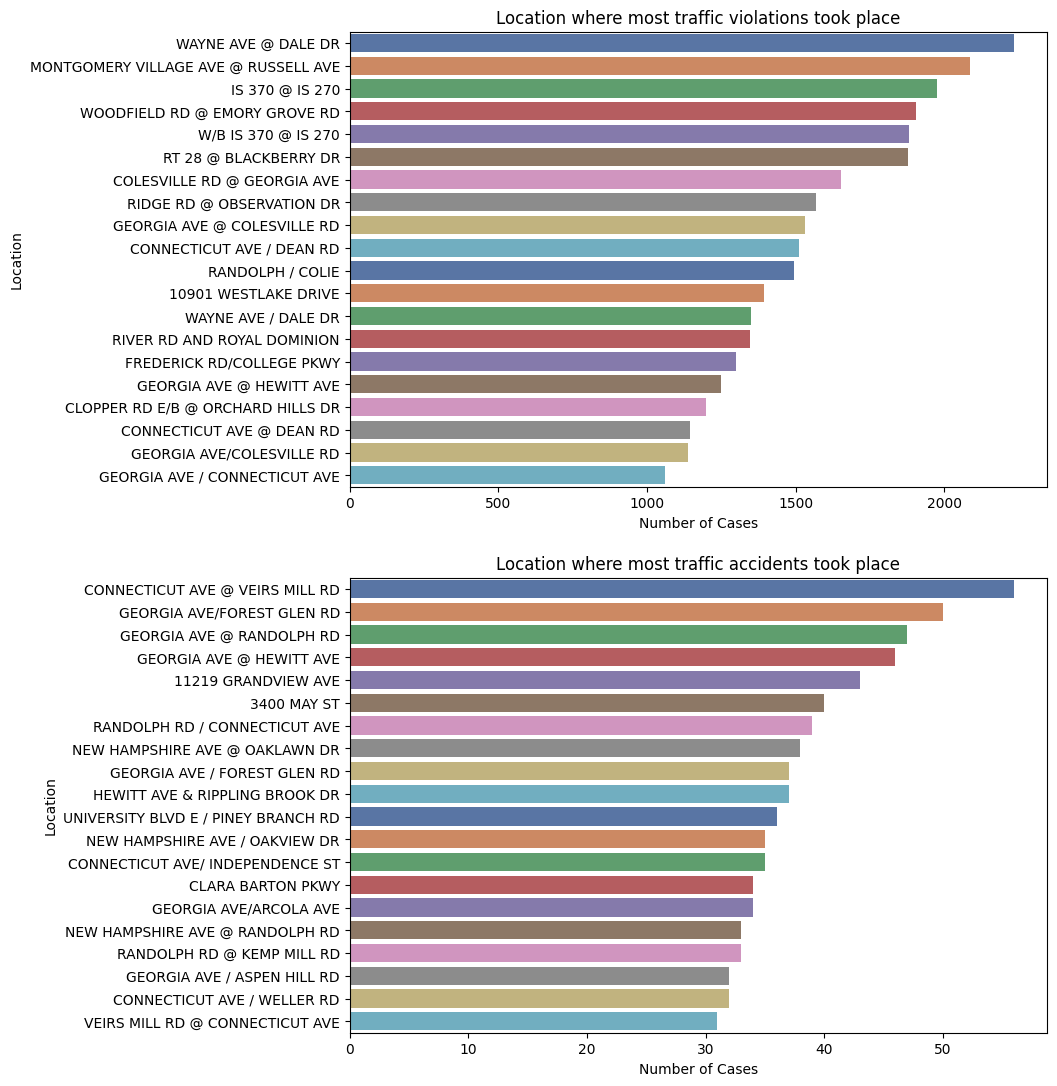

In [31]:
#Location
plt.figure(figsize=(9,13))
plt.subplot(211)
chains=df['Location'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Location where most traffic violations took place")
plt.xlabel("Number of Cases")


plt.subplot(212)
chains=df1['Location'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Location where most traffic accidents took place")
plt.xlabel("Number of Cases")

#### Automobile is the major vehicle type involved in most of the traffic violation and accident both around 90%.

Text(0.5, 1.0, 'Type of the vehicle involved in Traffic accident')

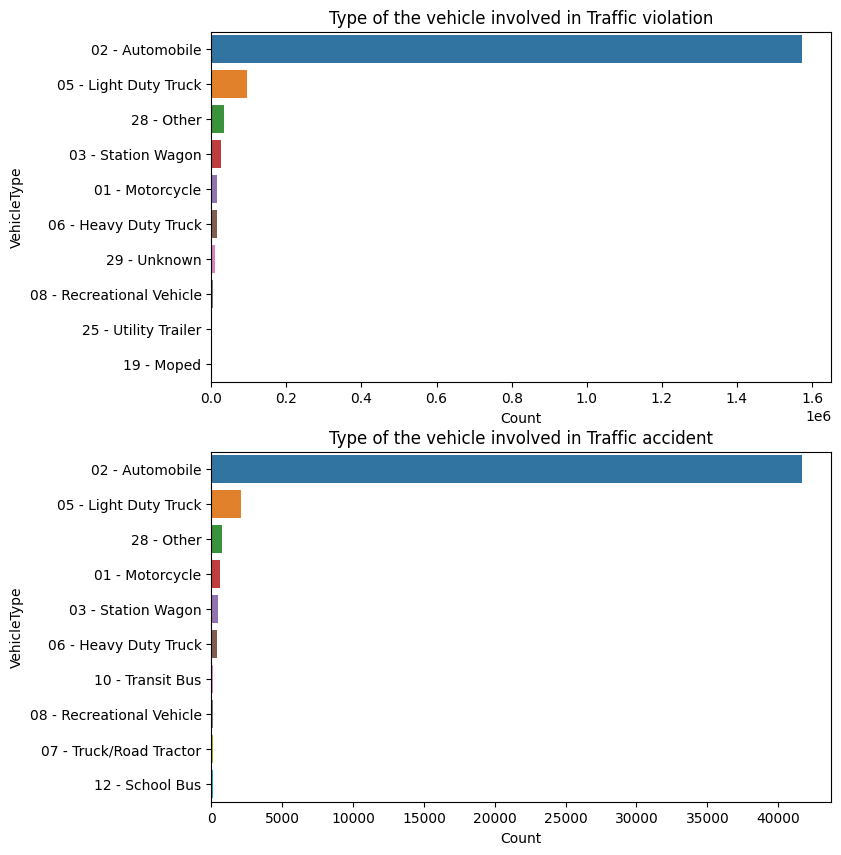

In [32]:
# Vehicle_Type
plt.figure(figsize=(8, 10))

# Subplot 1
plt.subplot(211)
cuisines = df['VehicleType'].value_counts()[:10]
sns.barplot(x=cuisines, y=cuisines.index)
plt.xlabel('Count')
plt.title("Type of the vehicle involved in Traffic violation")

# Subplot 2
plt.subplot(212)
cuisines = df1['VehicleType'].value_counts()[:10]
sns.barplot(x=cuisines, y=cuisines.index)
plt.xlabel('Count')
plt.title("Type of the vehicle involved in Traffic accident")


#### Most of the accidents are due to male in any given year

<Figure size 900x900 with 0 Axes>

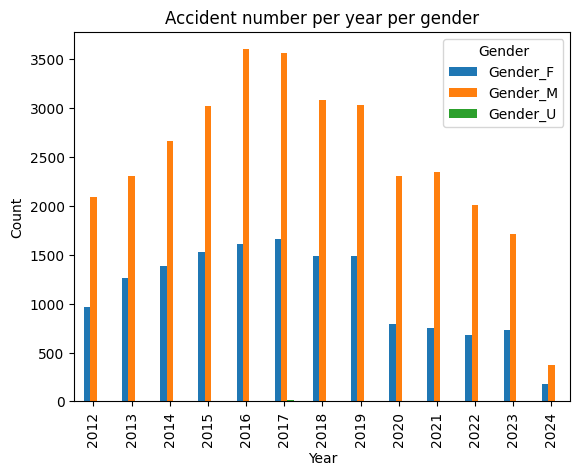

In [33]:
# Create a new DataFrame for analysis
g = df[['Accident', 'year', 'Gender_F', 'Gender_M', 'Gender_U']].copy()

# Identify the gender category with the maximum value for each row
g['Gender'] = g[['Gender_F', 'Gender_M', 'Gender_U']].idxmax(axis=1)

# Drop the one-hot encoded columns
g.drop(['Gender_F', 'Gender_M', 'Gender_U'], axis=1, inplace=True)

# Group by year and gender
count2 = g.groupby(['year', 'Gender'])

# Aggregate the total accidents for each group
totalsum = count2['Accident'].sum().unstack()

# Plotting
plt.figure(figsize=(9, 9))
totalsum.plot(kind='bar', title='Accident number per year per gender')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()


#### About 2.5% of the total female gender involved in a traffic violation lead to accident which is very also very close to male.

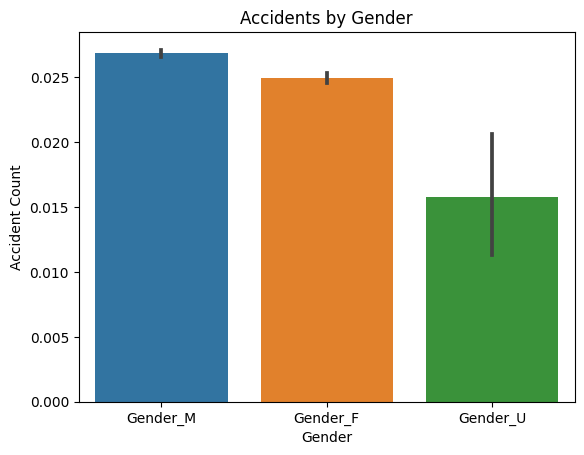

In [34]:
sns.barplot(x=g['Gender'], y=df['Accident'])
plt.xlabel('Gender')
plt.ylabel('Accident Count')
plt.title('Accidents by Gender')
plt.show()


#### most of the accidents are due to seat belt violations than alcohol related. There are no alcohol related accidents in 2018. 2015 has the highest no of accidents that are fatal. In all years there are high number of personal injury cases due to accidents.

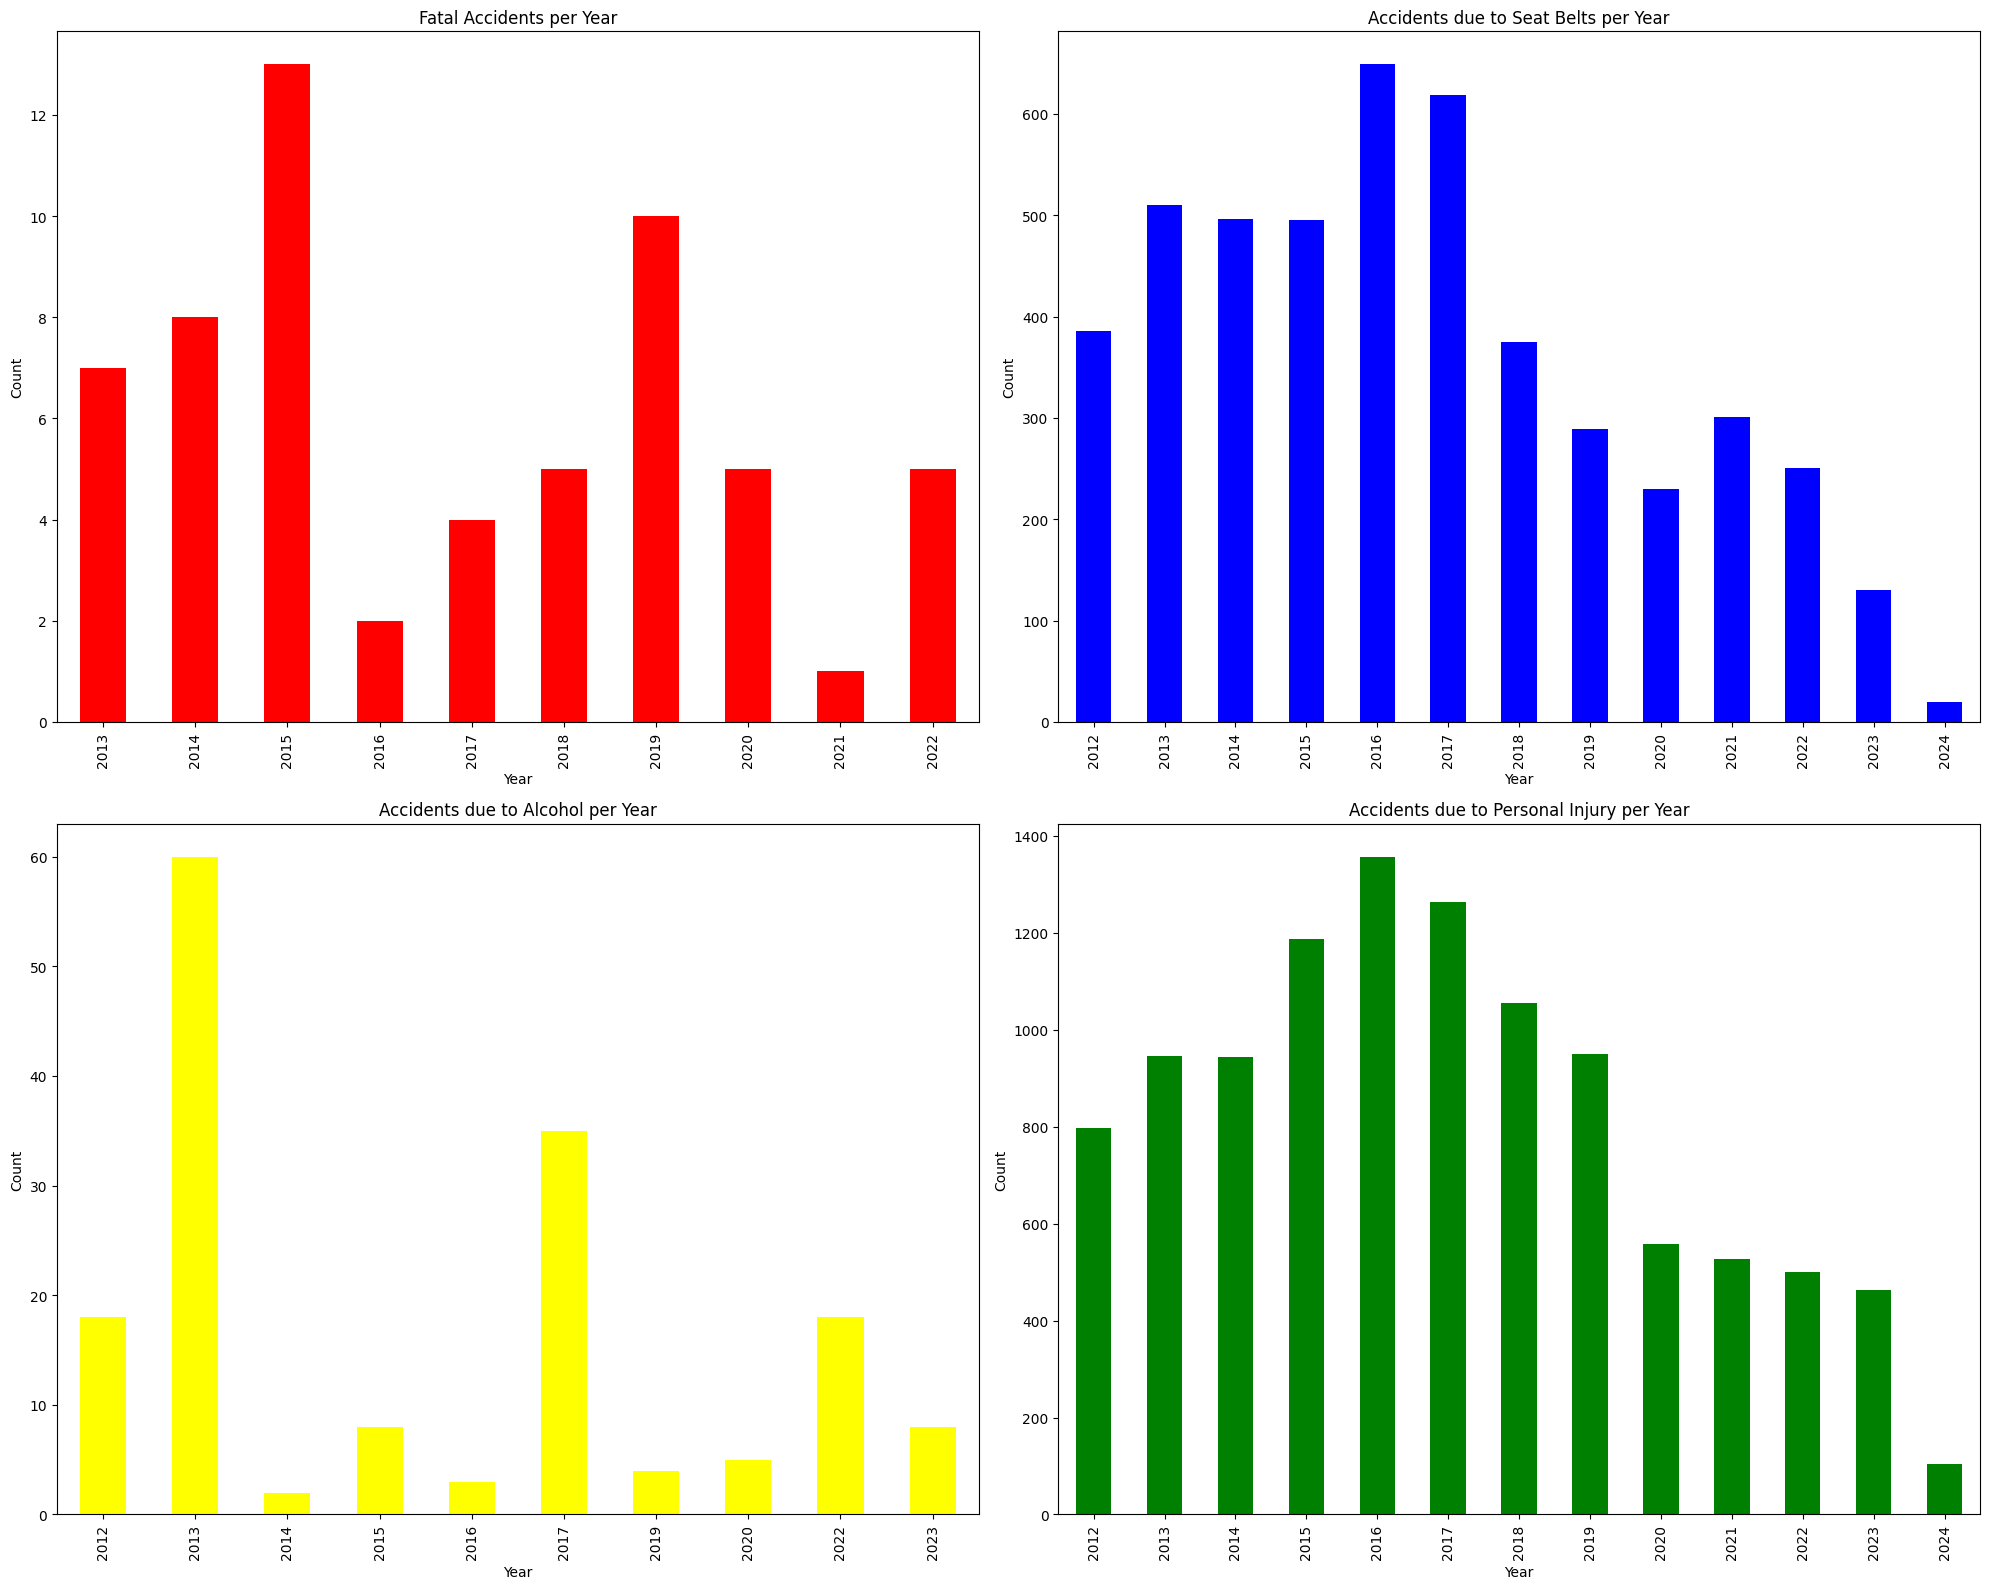

In [35]:
# Analysing the reasons for accidents (Seat Belt, Alcohol) and driver's condition after the accident like Fatal and personal injury
plt.figure(figsize=(20, 16))

# Analysis of Fatal accidents per year
plt.subplot(2, 2, 1)
mask_fatal = (df1['year'] >= 2012) & (df1['year'] < 2025) & (df1['Fatal'] != 0)
df_fatal = df1[mask_fatal]
count_fatal = df_fatal.groupby('year')['Fatal'].sum()
count_fatal.plot(kind='bar', color='red')
plt.title('Fatal Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Analysis of accidents due to Seat Belts per year
plt.subplot(2, 2, 2)
mask_belts = (df1['year'] >= 2012) & (df1['year'] < 2025) & (df1['Belts'] != 0)
df_belts = df1[mask_belts]
count_belts = df_belts.groupby('year')['Belts'].sum()
count_belts.plot(kind='bar', color='blue')
plt.title('Accidents due to Seat Belts per Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Analysis of accidents due to Alcohol per year
plt.subplot(2, 2, 3)
mask_alcohol = (df1['year'] >= 2012) & (df1['year'] < 2025) & (df1['Alcohol'] != 0)
df_alcohol = df1[mask_alcohol]
count_alcohol = df_alcohol.groupby('year')['Alcohol'].sum()
count_alcohol.plot(kind='bar', color='yellow')
plt.title('Accidents due to Alcohol per Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Analysis of accidents due to Personal Injury per year
plt.subplot(2, 2, 4)
mask_injury = (df1['year'] >= 2012) & (df1['year'] < 2025) & (df1['Personal_Injury'] != 0)
df_injury = df1[mask_injury]
count_injury = df_injury.groupby('year')['Personal_Injury'].sum()
count_injury.plot(kind='bar', color='green')
plt.title('Accidents due to Personal Injury per Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### We observe significant variations in the frequency of citations versus warnings across different violation types:

- Alcohol violations resulted in citations 9.43 times more often than warnings.
- Accidents led to citations 7.35 times more frequently than warnings.
- Personal injury incidents generated citations 6.65 times more often than warnings.
- Property damage cases resulted in citations 5.58 times more frequently than warnings.
- Work zone violations led to citations 1.47 times more often than warnings.

In [36]:
# Violation-wise traffic incidents
sub_df1 = pd.DataFrame(zip(df['Violation_Type'],df['Alcohol'],df['Belts'],df['Fatal'],df['Accident'],df['Work_Zone'],df['Personal_Injury'],df['Property_Damage']), columns=['violation','alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
sub_df1['workzone'] = sub_df1.workzone.eq(1).mul(1)
sub_df1['personalinjury'] = sub_df1.personalinjury.eq(1).mul(1)
sub_df1['propertydamage'] = sub_df1.propertydamage.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'], columns='violation', aggfunc='mean')
table1


violation,Citation,ESERO,SERO,Warning
accident,0.055820,0.002521,0.012346,0.003800
alcohol,0.002599,0.000099,0.002469,0.000146
belts,0.041644,0.027123,0.076543,0.023987
fatal,0.000217,0.000111,0.000000,0.000172
personalinjury,0.025375,0.000247,0.000000,0.001666
propertydamage,0.042493,0.000853,0.000000,0.003557
workzone,0.000363,0.000074,0.000000,0.000131


In [37]:
table2 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'], columns='violation', aggfunc='sum')
table2


violation,Citation,ESERO,SERO,Warning
accident,42877,204,10,3542
alcohol,1996,8,2,136
belts,31988,2195,62,22356
fatal,167,9,0,160
personalinjury,19491,20,0,1553
propertydamage,32640,69,0,3315
workzone,279,6,0,122


# Prediction of Accident Likelihood
#### When comparing seat belt violations with alcohol-related accidents, it's evident that drivers involved in seat belt violations (97%) were associated with more accidents than those related to alcohol (just 3%). This suggests that despite the enforcement measures for seat belt usage, there remains a significant number of violations resulting in accidents.

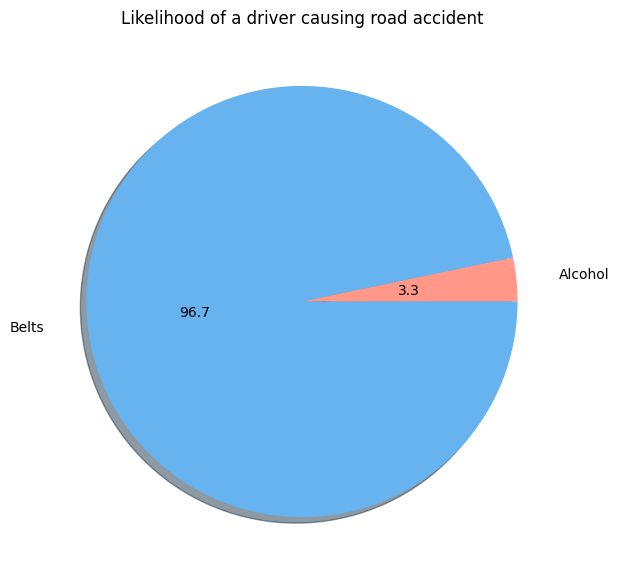

In [38]:
# Likelihood of a driver causing accident
slices = [((df['Accident'] == 1) & (df['Alcohol'] == 1)).sum(),
          ((df['Accident'] == 1) & (df['Belts'] == 1)).sum()]

labels = ['Alcohol', 'Belts']
colors = ['#ff9889', '#66b3f0']

plt.pie(slices, colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2, shadow=True)
fig = plt.gcf()
plt.title("Likelihood of a driver causing road accident")

fig.set_size_inches(7, 7)
plt.show()


From the provided table, we can draw the following conclusions:

1. **Alcohol-related accidents**: Despite being relatively fewer in number compared to other violation descriptions, alcohol-related accidents are still significant. This suggests that driving under the influence of alcohol remains a serious issue contributing to accidents on the road.

2. **Seat belt violations**: Violations related to seat belt usage are quite common and are associated with a substantial number of accidents. This indicates that non-compliance with seat belt regulations significantly contributes to the occurrence and severity of accidents.

3. **Fatal accidents**: While fatal accidents are fortunately less frequent than non-fatal ones, they are still concerning. Certain violation descriptions, such as "Negligent driving vehicle in careless and imprudent manner endangering property, life, and person," and "Driver failure to obey properly placed traffic control device instructions," are associated with a higher number of fatal accidents.

4. **Distribution of violations**: The distribution of violations varies across different violation descriptions. For example, "Failure to control vehicle speed on highway to avoid collision" and "Driver failure to obey properly placed traffic control device instructions" are associated with a higher number of accidents and violations related to seat belts.



In [39]:
sub_df1 = pd.DataFrame(zip(df['Description'], df['SubAgency'], df['Location'], df['Accident'], df['Alcohol'], df['Belts'], df['Fatal'], df['Longitude'], df['Latitude']), columns=['description', 'subagency', 'location', 'accident', 'alcohol', 'belts', 'fatal', 'long', 'lat'])

# Convert binary columns to integers
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)

table4 = pd.pivot_table(sub_df1, values=['alcohol', 'belts', 'fatal', 'accident'], index=['description'], aggfunc='sum')

acc_df = table4[table4['accident'] != 0]

acc_df = acc_df.sort_values('accident', ascending=False)

acc_df = acc_df.head(9)
acc_df

,accident,alcohol,belts,fatal
description,,,,
FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO AVOID COLLISION,8513,18,1925,9
"NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPRUDENT MANNER ENDANGERING PROPERTY, LIFE AND PERSON",3694,26,941,16
DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT OF WAY TO VEHICLE APPROACHING FROM OPPOSITE DIRECTION,2314,3,591,4
FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID COLLISION,1808,4,275,1
DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF ALCOHOL,1745,33,564,5
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,1648,27,4289,20
RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL DISREGARD FOR SAFETY OF PERSONS AND PROPERTY,1628,21,344,4
DRIVER CHANGING LANES WHEN UNSAFE,1498,11,705,8
DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED SIGNAL,1207,4,860,6


# Strategies to Reduce Violations:
#### 1. Public Awareness Campaigns: Launch comprehensive campaigns highlighting the dangers of alcohol-related accidents and the importance of responsible driving. Emphasize the legal consequences and potential harm to oneself and others.
#### 2. Enforcement and Penalties: Strengthen enforcement measures targeting alcohol violations, seat belt non-compliance, and other high-risk behaviors. Increase penalties for offenders to deter repeat violations and encourage compliance.
#### 3. Education and Training: Implement mandatory driver education programs focusing on safe driving practices, including the importance of seat belt usage and the dangers of driving under the influence. Offer defensive driving courses to improve driver awareness and skills.
#### 4. Technology Integration: Utilize technology such as breathalyzer ignition interlocks and seat belt reminder systems to encourage compliance and prevent alcohol-related accidents and seat belt violations.

#  Data Modeling

### Logistic Regression

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [41]:
df.head(5)

,created_at,updated_at,SeqID,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,VehicleType,Year,Make,Model,Violation_Type,Contributed_To_Accident,Race,Council Districts,Councils,Communities,Zip Codes,Municipalities,Council Districts_from_i23j_3mj8,Council Districts 7,Gender_F,Gender_M,Gender_U,Violation,year,month,day_of_week,day_code,month_code,hour
1,1700993415,1701166217,9be35886-e00c-49c2-8f27-2f6307696a17,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,TOYOTA,COROLLA,Citation,0,HISPANIC,4.0,4.0,23.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,5,Saturday,Nov,1
2,1700993415,1701166217,9be35886-e00c-49c2-8f27-2f6307696a17,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,TOYOTA,COROLLA,Citation,0,HISPANIC,4.0,4.0,23.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,5,Saturday,Nov,1
3,1701079814,1701252613,4d37fa99-0df3-4a56-9ba6-692bce894a34,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,0,0,0,1,0,0,0,0,0,02 - Automobile,2004.0,TOYOTA,HB,Citation,0,HISPANIC,4.0,4.0,23.0,6,1.0,4.0,2.0,0,1,0,1,2023,11,6,Sunday,Nov,10
9,1700993415,1701166217,1e24ec33-6a13-483f-9fea-0c2cdc5b2a14,"2nd District, Bethesda",FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,UNIVERSITY BLVD W & VEIRS MILL RD,39.041932,-77.058799,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,HYUN,ELANTA,Citation,0,HISPANIC,4.0,4.0,15.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,4,Friday,Nov,24
10,1700993415,1701166217,1e24ec33-6a13-483f-9fea-0c2cdc5b2a14,"2nd District, Bethesda","DRIVING, ATTEMPTING TO DRIVE MOTOR VEHICLE ON ...",UNIVERSITY BLVD W & VEIRS MILL RD,39.041932,-77.058799,0,0,0,0,0,0,0,0,0,02 - Automobile,2013.0,HYUN,ELANTA,Citation,0,HISPANIC,4.0,4.0,15.0,17,1.0,4.0,2.0,0,1,0,1,2023,11,4,Friday,Nov,24


**Encoding categorical labels (i.e., non-numeric labels) into numeric labels**

In [42]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781867 entries, 1 to 1918223
Data columns (total 41 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   created_at                        int64  
 1   updated_at                        int64  
 2   SeqID                             object 
 3   SubAgency                         object 
 4   Description                       object 
 5   Location                          object 
 6   Latitude                          float64
 7   Longitude                         float64
 8   Accident                          int64  
 9   Belts                             int64  
 10  Personal_Injury                   int64  
 11  Property_Damage                   int64  
 12  Fatal                             int64  
 13  Commercial_License                int64  
 14  Commercial_Vehicle                int64  
 15  Alcohol                           int64  
 16  Work_Zone                         int64  

In [44]:
df.loc[:, 'month_code'] = labelEncoder.fit_transform(df['month_code'])
df.loc[:, 'day_code'] = labelEncoder.fit_transform(df['day_code'])
df.loc[:, 'Violation_Type'] = labelEncoder.fit_transform(df['Violation_Type'])
df.loc[:, 'Model'] = labelEncoder.fit_transform(df['Model'])
df.loc[:, 'Make'] = labelEncoder.fit_transform(df['Make'])
df.loc[:, 'VehicleType'] = labelEncoder.fit_transform(df['VehicleType'])


In [45]:
x = df.drop(['Contributed_To_Accident','Location', 'Race', 'created_at', 'updated_at', 'SeqID', 'SubAgency', 'Zip Codes','Description','Accident'],axis=1)
y = df['Accident']

In [46]:
x.head()

,Latitude,Longitude,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,VehicleType,Year,Make,Model,Violation_Type,Council Districts,Councils,Communities,Municipalities,Council Districts_from_i23j_3mj8,Council Districts 7,Gender_F,Gender_M,Gender_U,Violation,year,month,day_of_week,day_code,month_code,hour
1,39.052962,-77.051304,0,0,0,0,0,0,0,0,1,2013.0,3922,6825,0,4.0,4.0,23.0,1.0,4.0,2.0,0,1,0,1,2023,11,5,2,9,1
2,39.052962,-77.051304,0,0,0,0,0,0,0,0,1,2013.0,3922,6825,0,4.0,4.0,23.0,1.0,4.0,2.0,0,1,0,1,2023,11,5,2,9,1
3,39.058378,-77.049652,0,0,1,0,0,0,0,0,1,2004.0,3922,10964,0,4.0,4.0,23.0,1.0,4.0,2.0,0,1,0,1,2023,11,6,3,9,10
9,39.041932,-77.058799,0,0,0,0,0,0,0,0,1,2013.0,1732,8297,0,4.0,4.0,15.0,1.0,4.0,2.0,0,1,0,1,2023,11,4,0,9,24
10,39.041932,-77.058799,0,0,0,0,0,0,0,0,1,2013.0,1732,8297,0,4.0,4.0,15.0,1.0,4.0,2.0,0,1,0,1,2023,11,4,0,9,24


In [47]:
y_value_counts = df['Accident'].value_counts()
print(y_value_counts)

Accident
0    1735234
1      46633
Name: count, dtype: int64


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(y_train.shape)

(1425493, 31)
(1425493,)


In [49]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state=40, solver='liblinear')
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=40, solver='liblinear')

In [50]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test) 

In [51]:
# Convert y_pred to a pandas Series (if not already)
y_pred_series = pd.Series(y_pred)

# Get the value counts
y_pred_value_counts = y_pred_series.value_counts()
print(y_pred_value_counts)

0    354441
1      1933
Name: count, dtype: int64


In [52]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 
cm

array([[346126,    946],
       [  8315,    987]])

In [53]:
from sklearn import metrics

In [54]:
acc_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy of Test:", acc_score)
print("mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

accuracy of Test: 0.9740132557369505
mean square error of Test: 0.025986744263049495


In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
count = np.count_nonzero(y_pred)
print(count)

1933


## KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [59]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [60]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.9780700431359537


In [61]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Test:", acc_score)
print("Mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

Accuracy of Test: 0.9755369359156392
Mean square error of Test: 0.024463064084360813


In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

KNN:   
Accuracy of Test: 0.9755369359156392  
Mean square error of Test: 0.024463064084360813


In [63]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[345659,   1413],
       [  7305,   1997]])